In [1197]:
## libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime


In [1198]:
import requests as re
import re # for regex
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
#nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle
from transformers import BertTokenizer, BertForSequenceClassification
from nltk.tokenize import word_tokenize
import string
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing import sequence
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


[nltk_data] Downloading package wordnet to /home/andsilva/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1199]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE

In [1200]:
now = datetime.now()
 
print("date..............:", now)

date..............: 2023-05-20 10:37:03.255752


In [1201]:
#### https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
df_reviews = pd.read_csv('../dataset/Reviews.csv') # full dataset
#df_reviews = pd.read_csv('../dataset/out.csv') # small part of the dataset

# dataset size:
print(f'Numero de linha: {df_reviews.shape[0]}, numero de colunas: {df_reviews.shape[1]}') 

Numero de linha: 568454, numero de colunas: 10


In [1202]:
######## parte do dataset
df_reviews_small = df_reviews.copy()
df_reviews = df_reviews_small.sample(1000) # FIXME remover no final

In [1203]:
# Lista valores faltantes
df_reviews.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [1204]:
# dataset - tamanho
df_reviews.shape

(1000, 10)

In [1205]:
# retirar linha com valores faltantes
df_reviews = df_reviews.dropna()

In [1206]:
# checar numero de linha faltantes
df_reviews.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [1207]:
df_reviews.shape

(1000, 10)

In [1208]:
# retirar os neutros.
df_reviews = df_reviews[df_reviews['Score'] != 3]

In [1209]:
df_reviews.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
441498,441499,B002X4YYJE,A26GUWRNFWZKQT,VicMizzy,0,0,5,1350172800,Excellent,Product arrived quickly and tastes great. We'v...
170922,170923,B000FTS87I,A38STE9B702H51,"luckyladyd ""luckyladyd""",0,0,5,1314316800,What a difference a little bit of nice salt ma...,We used this salt in the Sydney Seafood School...
158402,158403,B000HDMVNY,AXMUVZTIDYT9A,"C. L. Palmatier ""Gramma to 6""",0,0,5,1240704000,I Love this product,I absolutely love this Chai Latte and I look f...


In [1210]:
# lista a quantidade de cada categoria de score.
df_reviews['Score'].value_counts()

5    649
4    134
1     92
2     58
Name: Score, dtype: int64

In [1211]:
# redefinir score
def sentiment(label):
    if label == 5.0 or label == 4.0:
        return "0"
    #elif label == 3.0:
    #    return "Neutral"
    elif label == 1.0 or label == 2.0:
        return "1"
df_reviews['negative'] = df_reviews["Score"].apply(sentiment)

In [1212]:
df_reviews["negative"].value_counts()

0    783
1    150
Name: negative, dtype: int64

In [1213]:
#Mude df5 para df3 para pegar toda base
texts = df_reviews['Text'].sum()
texts[0:1000]

'Product arrived quickly and tastes great. We\'ve already ordered and received a 2nd container and a friend wants some too.We used this salt in the Sydney Seafood School cooking classes when we attended last month and I fell in love.  It\'s lovely and coarse.  The flakes are just the right size for "pinching" and the taste when raw is delicious.I absolutely love this Chai Latte and I look forward to having my two cups of it every morning. I am on weight watchers and it is only 2 points per cup. The taste is so smooth and soothing and its a great taste to start my day. The price is about average with other same products and well worth paying it.This honey doesn\'t have a UMF rating for some reason. New Zealand is strict about how manuka honey is labeled, and Comvita sells other honeys that do have a UMF rating, so I\'m uncertain why this one is labeled "certified" and "active" without having an actual UMF number or certification anywhere on it. That being said, this is probably the best

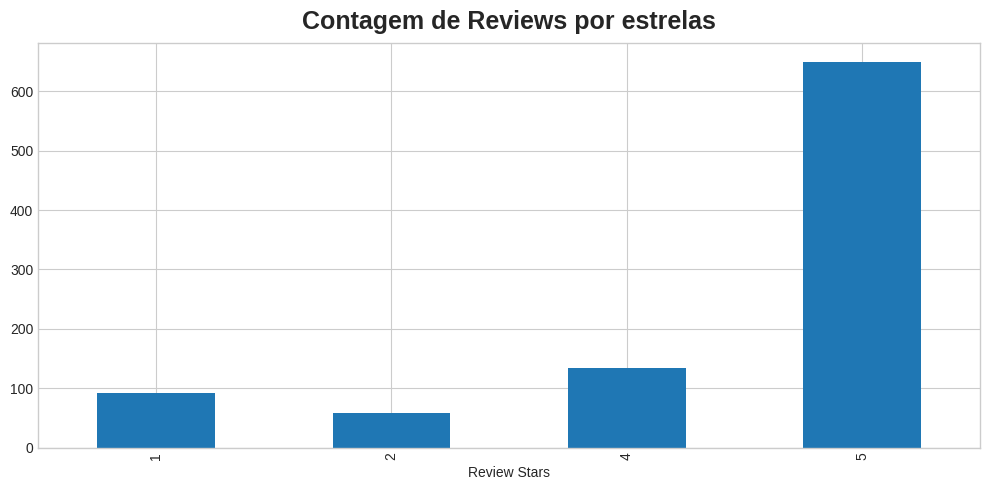

In [1214]:
ax = df_reviews['Score'].value_counts().sort_index().plot(kind='bar',
                                                  title='Contagem de Reviews por estrelas',
                                                  figsize=(10, 5)
                                                 )

ax.set_xlabel('Review Stars')
plt.show()

In [1215]:
stop_pt = nltk.corpus.stopwords.words('portuguese')
stop_en = nltk.corpus.stopwords.words('english')
stopwords_pa = stop_en + stop_pt
stopwords_pa.extend(['-',''])

In [1216]:
list_words = texts.split()
list_words = [l.strip().lower() for l in list_words]


In [1217]:
# lista de palavras do Text 'reviews'
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stopwords_pa]
freqdist = Counter(list_words)
dict(freqdist.most_common(10))

{'like': 455,
 'br': 387,
 'good': 333,
 'coffee': 314,
 'taste': 276,
 'one': 255,
 'product': 249,
 'great': 249,
 'tea': 225,
 'love': 222}

In [1218]:
from wordcloud import WordCloud
cleaned = ' '.join(list_words)
wordcloud = WordCloud().generate(cleaned)

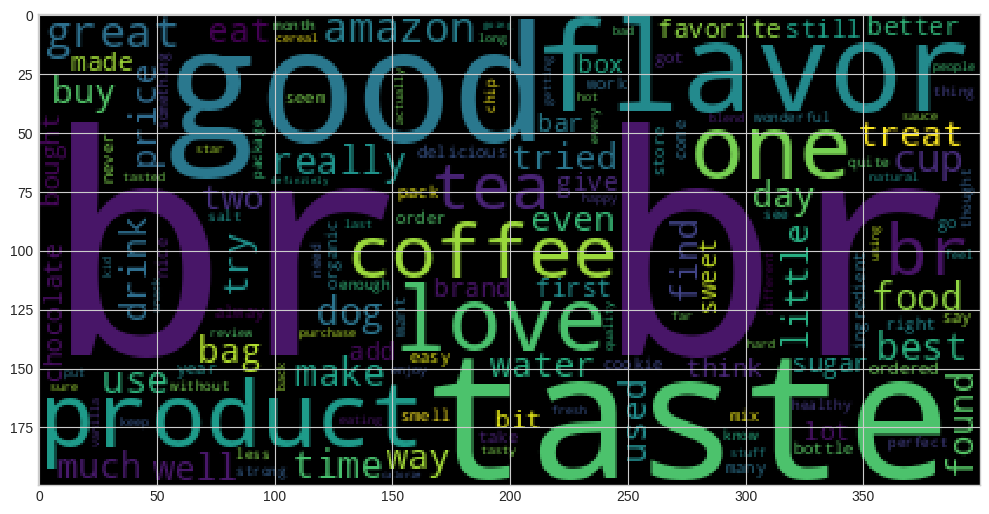

In [1219]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='nearest')
plt.tight_layout()

In [1220]:
freq_common_works = dict(freqdist.most_common(10))
freq_common_works

{'like': 455,
 'br': 387,
 'good': 333,
 'coffee': 314,
 'taste': 276,
 'one': 255,
 'product': 249,
 'great': 249,
 'tea': 225,
 'love': 222}

In [1221]:
common_words = list(freq_common_works.keys())
common_words = common_words[0:4]

In [1222]:
dispersion_words = common_words
plt.figure(figsize=(16,6))
#nltk_text.dispersion_plot(dispersion_words)

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

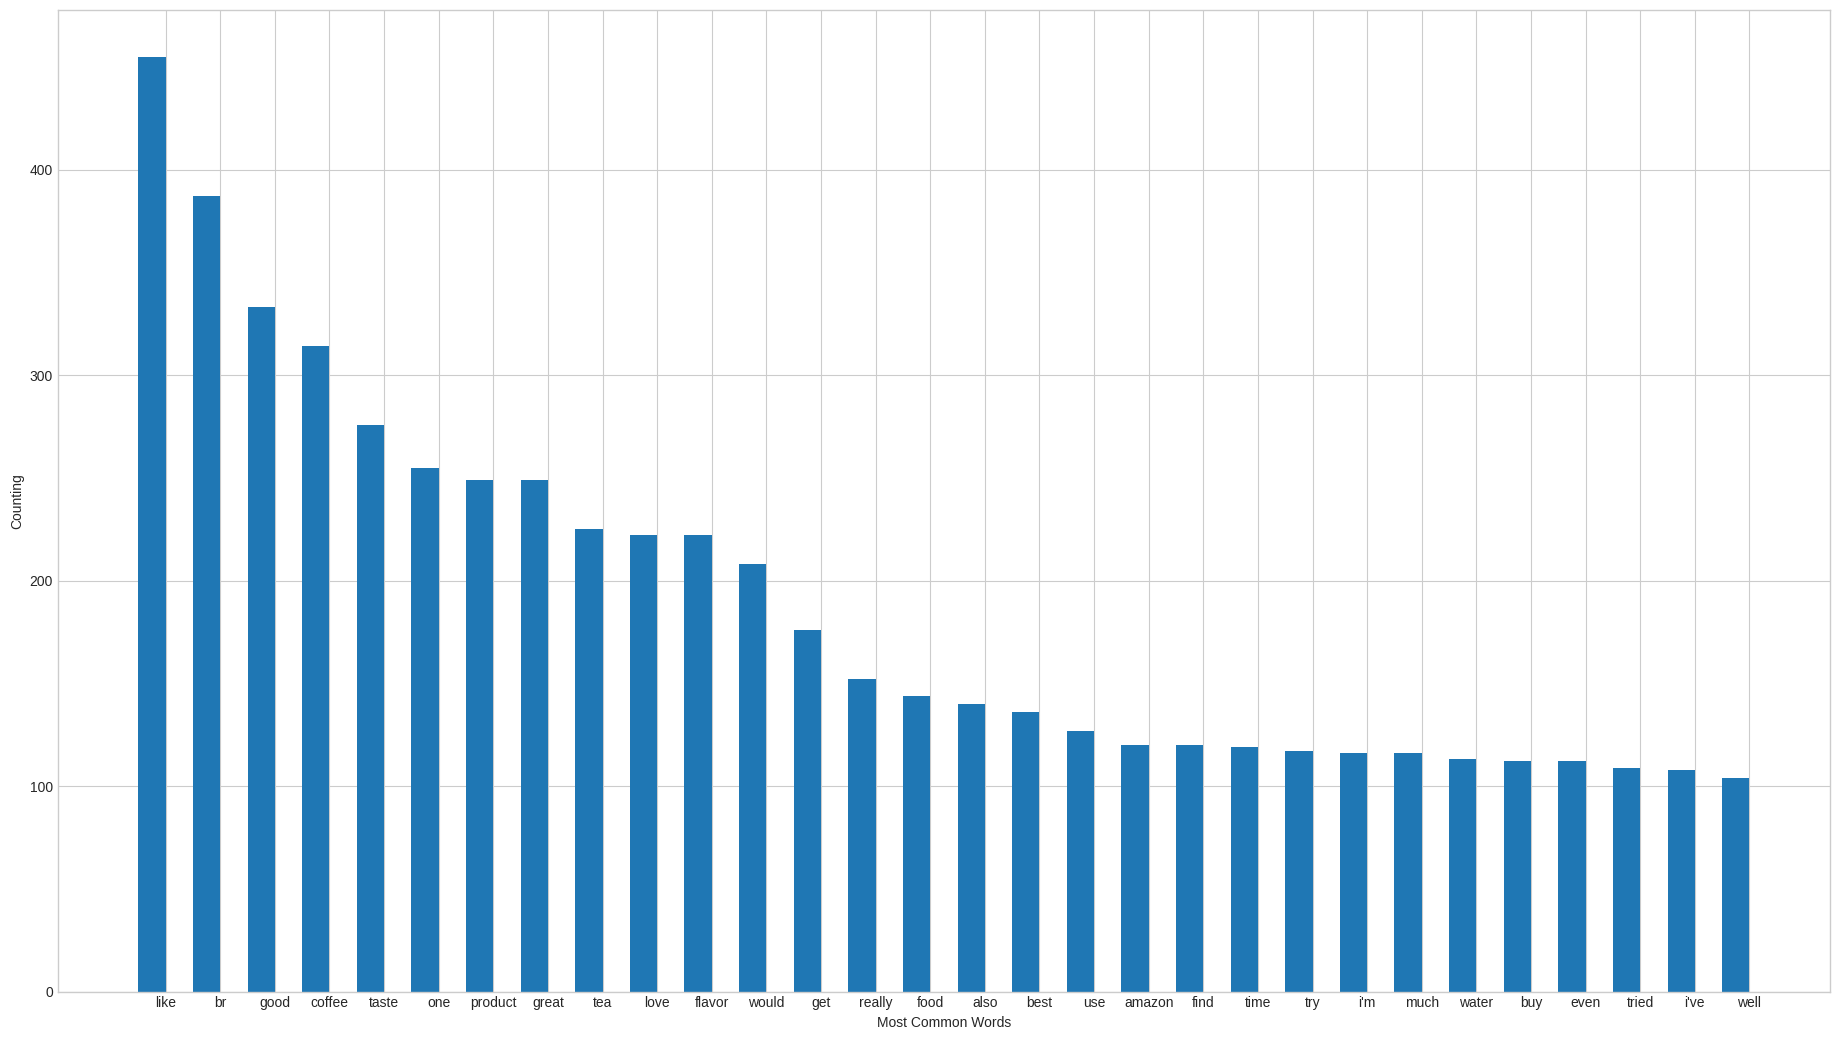

In [1223]:
labels, values = zip(*freqdist.most_common(30))

indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(indexes + width * 0.5, labels)
plt.xlabel('Most Common Words') 
plt.ylabel('Counting') 
plt.show()

### Data Preparation

In [1224]:
# remove tags html
# cleaning
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

df_reviews['Text'] = df_reviews['Text'].apply(clean)

In [1225]:
# remover caracteres especiais
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

df_reviews['Text'] = df_reviews['Text'].apply(is_special)

In [1226]:
# Converter - lowercase
def to_lower(text):
    return text.lower()

df_reviews['Text'] = df_reviews['Text'].apply(to_lower)

In [1227]:
nltk.download('stopwords')
nltk.download('punkt')

def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df_reviews['Text'] = df_reviews['Text'].apply(rem_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1228]:
#No review tenha palavras de outro idioma
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

df_reviews['Text'] = df_reviews['Text'].apply(stem_txt)
#df_reviews['Text']

In [1229]:
df_reviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'negative'],
      dtype='object')

In [1230]:
# converter string para inteiro
df_reviews['negative'] = pd.to_numeric(df_reviews['negative'])

In [1231]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933 entries, 441498 to 59348
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      933 non-null    int64 
 1   ProductId               933 non-null    object
 2   UserId                  933 non-null    object
 3   ProfileName             933 non-null    object
 4   HelpfulnessNumerator    933 non-null    int64 
 5   HelpfulnessDenominator  933 non-null    int64 
 6   Score                   933 non-null    int64 
 7   Time                    933 non-null    int64 
 8   Summary                 933 non-null    object
 9   Text                    933 non-null    object
 10  negative                933 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 87.5+ KB


In [1232]:
df_reviews['Text']

441498    product arriv quick tast great alreadi order r...
170922    use salt sydney seafood school cook class atte...
158402    absolut love chai latt look forward two cup ev...
164883    honey umf rate reason new zealand strict manuk...
254573    starbuck breakfast blend tad bitter ubiquit pi...
                                ...                        
226704    make enjoy life chocol chip make bar kid love ...
478394    black walnut excel flavor ice cream wonder una...
304915    think maker granola intend cereal ate snack pr...
72042     use head shoulder b c moder dandruff shampoo w...
59348     rice pud great hint vanilla flavor make everi ...
Name: Text, Length: 933, dtype: object

In [1233]:
# create preprocess_text function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]


    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [1234]:
df_reviews['Text'] = df_reviews['Text'].apply(preprocess_text)
df_reviews['Text']

441498    product arriv quick tast great alreadi order r...
170922    use salt sydney seafood school cook class atte...
158402    absolut love chai latt look forward two cup ev...
164883    honey umf rate reason new zealand strict manuk...
254573    starbuck breakfast blend tad bitter ubiquit pi...
                                ...                        
226704    make enjoy life chocol chip make bar kid love ...
478394    black walnut excel flavor ice cream wonder una...
304915    think maker granola intend cereal ate snack pr...
72042     use head shoulder b c moder dandruff shampoo w...
59348     rice pud great hint vanilla flavor make everi ...
Name: Text, Length: 933, dtype: object

In [1235]:
# Set the parameters
max_features = 5000  # Maximum number of words to keep
max_length = 300  # Maximum length of each review
batch_size = 64
epochs = 10

In [1236]:
# Build the model
model_tf = Sequential()
model_tf.add(Embedding(max_features, 128))
model_tf.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_tf.add(Dense(1, activation='sigmoid'))

# Compile the model
model_tf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [1237]:
#Salvando modelo 
pickle.dump(model_tf,open('model_tensorflow.pkl','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......embedding
.........vars
............0
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-05-20 10:37:16         2223
metadata.json                                  2023-05-20 10:37:16           64
variables.h5                                   2023-05-20 10:37:16      3103176


In [1238]:
X = df_reviews['Text']
y = df_reviews['negative']

In [1239]:
X = np.array(df_reviews['Text'])
y = np.array(df_reviews['negative'])

In [1240]:
cv = CountVectorizer()
X = cv.fit_transform(X).toarray()
#word_freq = dict(zip(cv.get_feature_names_out(), np.asarray(bow.sum(axis=0)).ravel()))

smote = SMOTE()

# inbalance data to balance
X, y = smote.fit_resample(X, y)

print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (1566, 4601)
y.shape =  (1566,)


In [1241]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=0)

In [1242]:
#Criando funções para avaliação dos modelos
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.grid(False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [1243]:
def clf_eval(clf, X, y_true, classes=['Positivo', 'Negativo']):
    y_pred = clf.predict(X)
    clf_matrix = confusion_matrix(y_true, y_pred)
    print('Classification Report')
    print(classification_report(y_true, y_pred, target_names=classes))
    print('ROC Score: {}'.format(roc_auc_score(y_true, y_pred)))
    print('Accuracy Score: {}'.format(accuracy_score(y_true, y_pred)))
    print('Average Precision Score: {}'.format(average_precision_score(y_true, y_pred)))
    print('f1 Score: {}'.format(f1_score(y_true, y_pred)))
    plot_confusion_matrix(clf_matrix, classes=classes)
    return roc_auc_score(y_true, y_pred)

## Modeling

### Machine Learning

#### Gaussian Naive Bayes (GaussianNB).

Classification Report
              precision    recall  f1-score   support

    Positivo       1.00      0.97      0.99       631
    Negativo       0.97      1.00      0.99       621

    accuracy                           0.99      1252
   macro avg       0.99      0.99      0.99      1252
weighted avg       0.99      0.99      0.99      1252

ROC Score: 0.9873217115689382
Accuracy Score: 0.987220447284345
Average Precision Score: 0.9748822605965463
f1 Score: 0.9872813990461049
Confusion matrix, without normalization
[[615  16]
 [  0 621]]


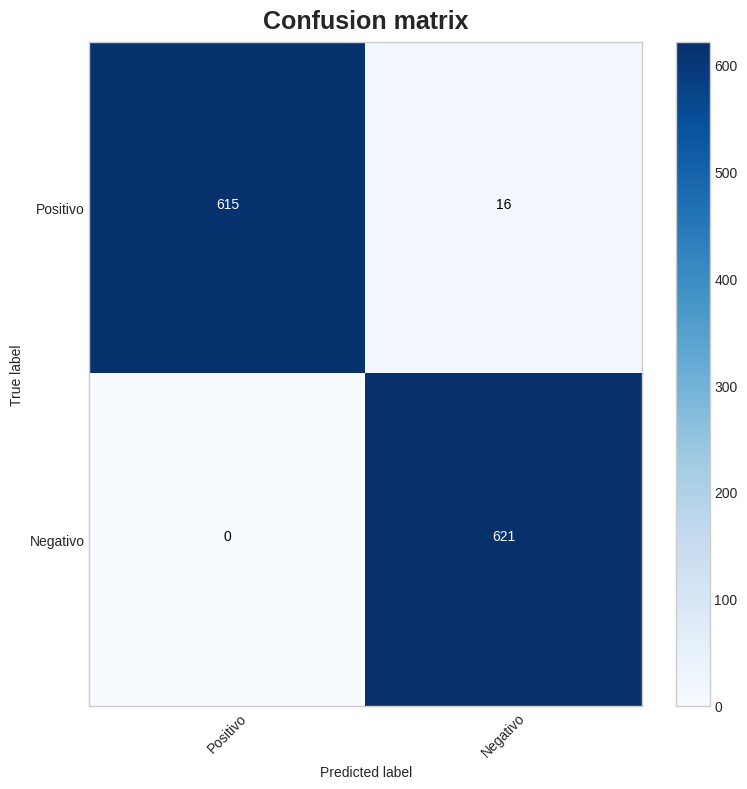

In [1244]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB().fit(x_train, y_train)
roc_gnb = clf_eval(clf_gnb, x_train, y_train)

#### Naive Bayes classifier for multivariate Bernoulli model

Classification Report
              precision    recall  f1-score   support

    Positivo       0.94      0.81      0.87       631
    Negativo       0.83      0.95      0.88       621

    accuracy                           0.88      1252
   macro avg       0.88      0.88      0.88      1252
weighted avg       0.88      0.88      0.88      1252

ROC Score: 0.876758002403975
Accuracy Score: 0.8761980830670927
Average Precision Score: 0.8105178601357648
f1 Score: 0.8835462058602555
Confusion matrix, without normalization
[[509 122]
 [ 33 588]]


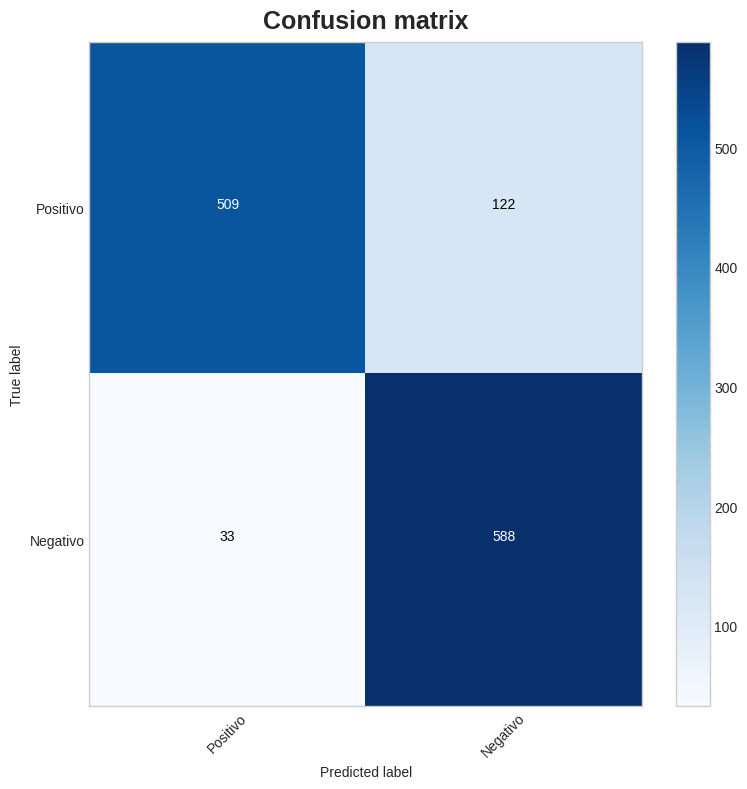

In [1245]:
from sklearn.naive_bayes import BernoulliNB

clf_bnb = BernoulliNB(alpha=0.20, 
                     binarize=0.0, 
                     fit_prior=True, 
                     class_prior=None).fit(x_train, y_train)

roc_bnb = clf_eval(clf_bnb, x_train, y_train)

#### Gradient Boosting for classification.

In [1246]:
gb_clf = GradientBoostingClassifier()
gb_clf_sa =gb_clf.fit(x_train, y_train)
pred_train = gb_clf_sa.predict(x_train)

Classification Report
              precision    recall  f1-score   support

    Positivo       0.90      0.82      0.86       152
    Negativo       0.84      0.91      0.88       162

    accuracy                           0.87       314
   macro avg       0.87      0.86      0.87       314
weighted avg       0.87      0.87      0.87       314

ROC Score: 0.8646848602988955
Accuracy Score: 0.8662420382165605
Average Precision Score: 0.8128239221657481
f1 Score: 0.8757396449704142
Confusion matrix, without normalization
[[124  28]
 [ 14 148]]


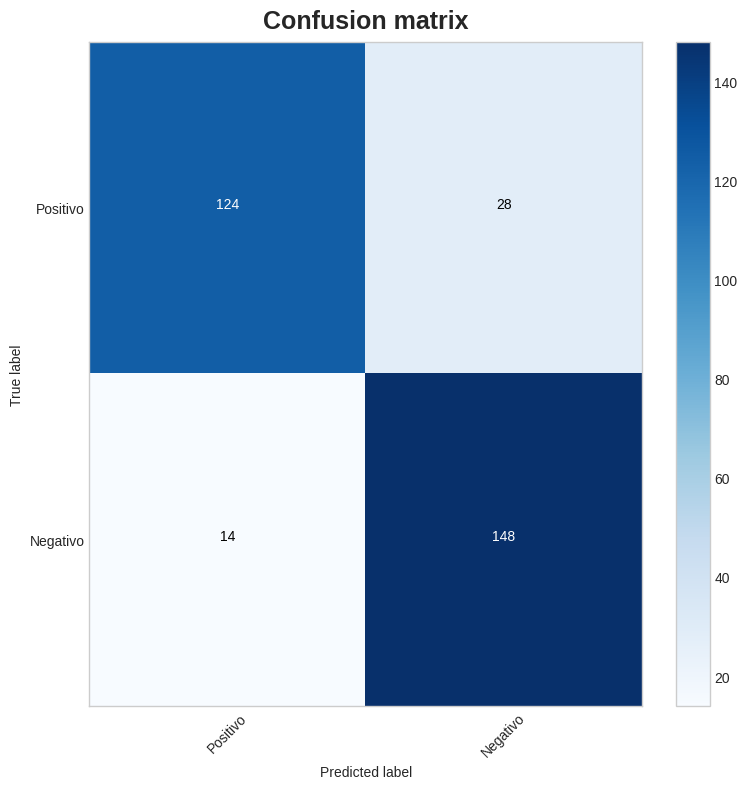

In [1247]:
roc_gb = clf_eval(gb_clf_sa, x_validation, y_validation)

#### Deep learning: Keras

In [1248]:
plt.style.use("seaborn-v0_8-whitegrid")
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [1249]:
model = keras.Sequential([layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='sigmoid'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1),
                         ])

model.compile(optimizer='adam', loss='mae',)

In [1250]:
# fitting...
history = model.fit(x_train, y_train,
                    validation_data=(x_validation, y_validation),
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                   )

Epoch 1/10
5/5 [==============================] - 2s 173ms/step - loss: 2.2473 - val_loss: 1.3595
Epoch 2/10
5/5 [==============================] - 1s 125ms/step - loss: 1.5871 - val_loss: 1.1375
Epoch 3/10
5/5 [==============================] - 1s 116ms/step - loss: 1.4909 - val_loss: 1.0121
Epoch 4/10
5/5 [==============================] - 1s 151ms/step - loss: 1.3290 - val_loss: 0.8760
Epoch 5/10
5/5 [==============================] - 1s 124ms/step - loss: 1.0750 - val_loss: 0.7714
Epoch 6/10
5/5 [==============================] - 1s 121ms/step - loss: 0.9554 - val_loss: 0.7028
Epoch 7/10
5/5 [==============================] - 1s 114ms/step - loss: 0.8905 - val_loss: 0.6477
Epoch 8/10
5/5 [==============================] - 1s 123ms/step - loss: 0.8469 - val_loss: 0.6271
Epoch 9/10
5/5 [==============================] - 1s 121ms/step - loss: 0.8643 - val_loss: 0.5866
Epoch 10/10
5/5 [==============================] - 1s 122ms/step - loss: 0.7836 - val_loss: 0.5939


Text(0.5, 1.0, 'The learning curves')

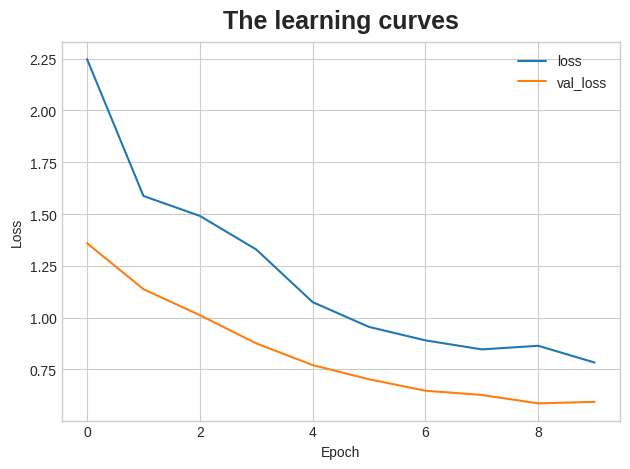

In [1251]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('The learning curves')

10/10 [==============================] - 0s 12ms/step
Classification Report
              precision    recall  f1-score   support

    Positivo       0.48      1.00      0.65       152
    Negativo       0.00      0.00      0.00       162

    accuracy                           0.48       314
   macro avg       0.24      0.50      0.33       314
weighted avg       0.23      0.48      0.32       314

ROC Score: 0.5
Accuracy Score: 0.4840764331210191
Average Precision Score: 0.5159235668789809
f1 Score: 0.0
Confusion matrix, without normalization
[[152   0]
 [162   0]]


/home/andsilva/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andsilva/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andsilva/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


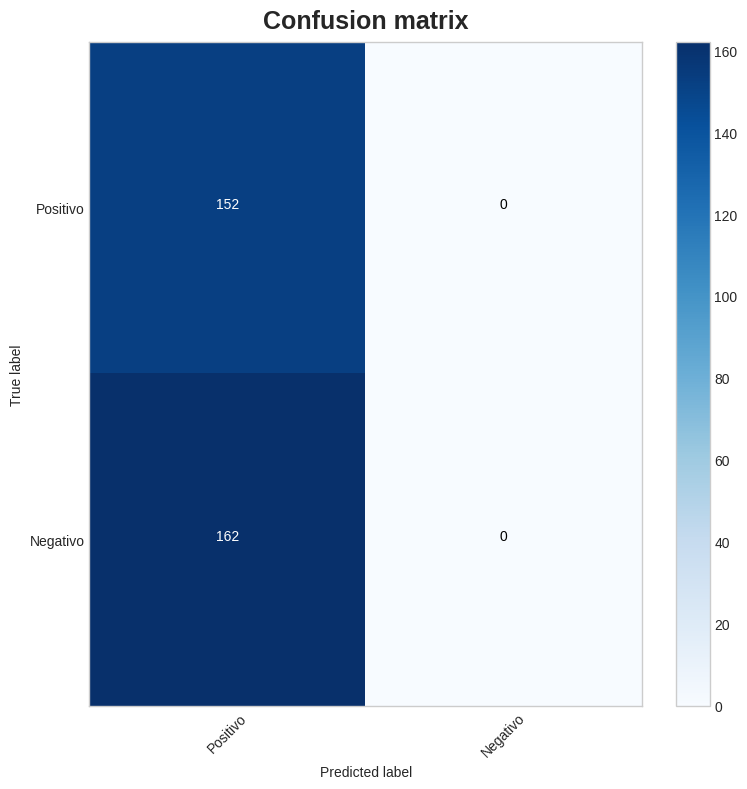

In [1252]:
y_pred= (model.predict(x_validation) > 0.5).astype("int32")

clf_matrix = confusion_matrix(y_validation, y_pred)
print('Classification Report')
print(classification_report(y_validation, y_pred, target_names=['Positivo', 'Negativo']))
print('ROC Score: {}'.format(roc_auc_score(y_validation,y_pred)))
print('Accuracy Score: {}'.format(accuracy_score(y_validation, y_pred)))
print('Average Precision Score: {}'.format(average_precision_score(y_validation, y_pred)))
print('f1 Score: {}'.format(f1_score(y_validation, y_pred)))
plot_confusion_matrix(clf_matrix, classes=['Positivo', 'Negativo'])
roc_keras = roc_auc_score(y_validation, y_pred)

In [1255]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True) 

In [1257]:
clf_gnb_roc = clf_gnb.predict(x_validation)
model_roc = model.predict(x_validation)

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_validation, clf_gnb_roc)
fpr_net, tpr_net_lr, thresholds_net_lr = roc_curve(y_validation, model_roc)

10/10 [==============================] - 0s 13ms/step


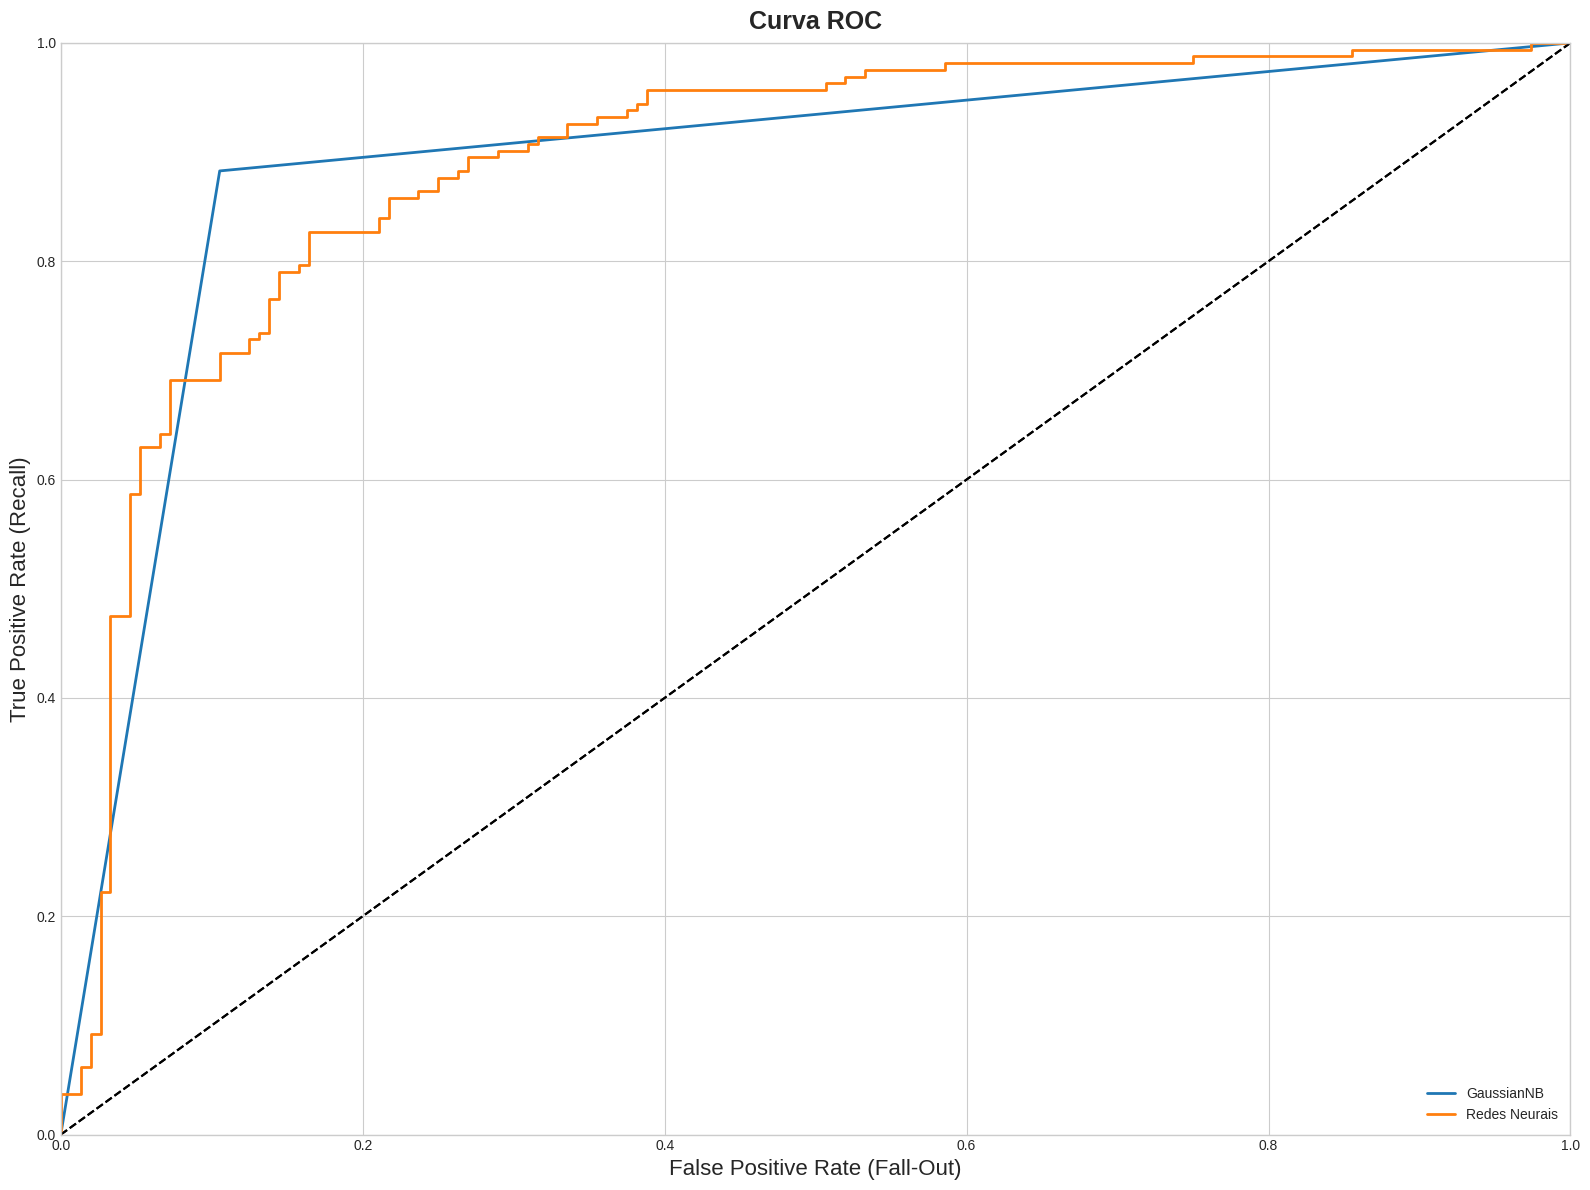

In [1258]:
plt.figure(figsize=(16, 12))                                    # Not shown
plot_roc_curve(fpr_lr, tpr_lr, label='GaussianNB')
plot_roc_curve(fpr_net, tpr_net_lr, label='Redes Neurais')
#plot_roc_curve(fpr_bnb, tpr_bnb, label='BernoulliNB')
#plot_roc_curve(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.legend(loc="lower right")
plt.title('Curva ROC', fontweight="bold")
plt.show()